In [39]:
import os
from os import listdir
import pandas as pd
import plotly.graph_objs as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/Users/lancy/Desktop/Topics-Extraction-Hotel-Reviews/Nlp project/hotel-reviews/Datafiniti_Hotel_Reviews_Jun19.csv', header=0)
df.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.44178,...,2018-01-03T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-09T00:00:00Z,4,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
2,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-09T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3217...,"Parking was horrible, somebody ran into my ren...",Business,Prescott Valley,AZ,15Deborah,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
3,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-31T00:00:00Z,5,https://www.tripadvisor.com/Hotel_Review-g3217...,Not cheap but excellent location. Price is som...,Very good,Guaynabo,PR,Wilfredo M,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
4,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,"2016-10-09T00:00:00Z,2016-03-27T00:00:00Z",2,https://www.tripadvisor.com/Hotel_Review-g3217...,If you get the room that they advertised on th...,Low chance to come back here,Reno,NV,Luc D,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com


In [40]:
from wordcloud import WordCloud

def wc(df,bgcolor,title):
    plt.figure(figsize = (50,50))
    wc = WordCloud(background_color = bgcolor, max_words = 2000, random_state=42, max_font_size = 50)
    wc.generate(' '.join(df))
    plt.imshow(wc)
    plt.axis('off')

In [41]:
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")
polarity=[]
subjectivity=[]
for i in df['reviews.text']:
    try:
        analysis =TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
        
    except:
        polarity.append(0)
        subjectivity.append(0)

In [42]:
df['polarity']=polarity
df['subjectivity']=subjectivity

In [44]:
#positive comments
df[['name','reviews.text','polarity','subjectivity']][df.polarity>0].head(20)

,name,reviews.text,polarity,subjectivity
0,Best Western Plus South Coast Inn,"This hotel was nice and quiet. Did not know, t...",0.187500,0.407292
1,Best Western Carmel's Town House Lodge,We stayed in the king suite with the separatio...,0.399524,0.497143
3,Best Western Carmel's Town House Lodge,Not cheap but excellent location. Price is som...,0.495238,0.714286
4,Best Western Carmel's Town House Lodge,If you get the room that they advertised on th...,0.214286,0.485714
5,21c Museum Hotel Lexington,"This is such a fun, lovely hotel. The attentio...",0.198077,0.571154
6,21c Museum Hotel Lexington,We recently stayed at this hotel on a trip to ...,0.182143,0.403571
10,Hampton Inn Lexington Medical Center,This is a new Hampton Inn and is well decorate...,0.141970,0.563788
11,Motel 6 Santa Barbara - Carpinteria North,I stayed here for three nights while I explore...,0.318182,0.500000
12,Comfort Inn,Completely accommodating hotel! I booked a res...,0.107500,0.573333
13,The Whitney Hotel,The water is very hot and there's no cold wate...,0.125574,0.715801


In [45]:
#negative comments
df[['name','reviews.text','polarity','subjectivity']][df.polarity<0].head(20)

,name,reviews.text,polarity,subjectivity
2,Best Western Carmel's Town House Lodge,"Parking was horrible, somebody ran into my ren...",-0.350000,0.650000
7,Springs Motel LLC,"I reserved a room a week in advance, knowing a...",-0.400000,0.750000
9,American Inn,"Hello, I have traveled a lot and abroad and by...",-0.342857,0.928571
15,The Whitney Hotel,"This Hotel, formerly a prestigious bank, may b...",-0.041127,0.500326
94,"Marriott Vacation Club Pulse, San Diego",accused of smoking in my room. only young blac...,-0.150852,0.578409
117,Hampton Inn San Diego/Mission Valley,The A/C unit under the window blows air direct...,-0.250000,0.700000
165,Best Western Seven Seas,I guess they don't care about the little critt...,-0.250000,0.375000
183,Best Western Seven Seas,we checked in around 8pm room air conditioner ...,-0.033333,0.362500
196,Best Western Seven Seas,This was a terrible experience our room had na...,-0.075505,0.504401
206,Best Western Seven Seas,"Gnats in room, I had bites all over my body an...",-0.362556,0.619778


In [46]:
#neutral comments
df[['name','reviews.text','polarity','subjectivity']][df.polarity==0].head(20)

,name,reviews.text,polarity,subjectivity
8,Microtel Inn Suites By Wyndham Lexington,MoreMore,0.0,0.000000
89,Pavilion Inn,MoreMore,0.0,0.000000
1115,Geneva Motel,"Yesterday Sunday March 27, I reserved a one be...",0.0,0.000000
1116,Microtel Inn Suites By Wyndham Culpeper,MoreMore,0.0,0.000000
1334,Luana Waikiki Hotel & Suites,if you stay in this hotel dont accept room 107...,0.0,0.250000
1422,Luana Waikiki Hotel & Suites,My Mom and I went to Hawaii for a week and on ...,0.0,1.000000
1490,Hawthorn Suites By Wyndham Louisville/jefferso...,MoreMore,0.0,0.000000
2191,San Francisco International Hostel,"Norman Bates fundo este sitio, seguro. Sucio y...",0.0,0.000000
2342,Days Inn By Wyndham Orlando/International Drive,The bill receipt which I have received from Da...,0.0,0.000000
2609,Hyatt Place Chicago Downtown/The Loop,We checked into the Hotel and paid over 439 fo...,0.0,0.000000


In [47]:
#high subjective reviews
df[['name','reviews.text','polarity','subjectivity']][df.subjectivity>0.8].head(20)

,name,reviews.text,polarity,subjectivity
9,American Inn,"Hello, I have traveled a lot and abroad and by...",-0.342857,0.928571
74,Drury Inn Suites Colorado Springs Near The Air...,Our organization arranged for our out-of-town ...,1.000000,1.000000
75,Drury Inn Suites Colorado Springs Near The Air...,Our stay was great at the Drury Inn. Stayed on...,0.684286,0.832857
83,Drury Inn Suites Colorado Springs Near The Air...,We have never stayed here before but decided t...,0.544444,0.833333
102,"Marriott Vacation Club Pulse, San Diego",My husband has business here and I tagged alon...,0.625833,0.865833
110,Four Points by Sheraton San Diego - SeaWorld,I used this hotel for an event we were having ...,0.564815,0.808025
168,Best Western Seven Seas,Awesome hotel in the circle perfect located 10...,0.789518,0.850000
249,Best Western Seven Seas,All in all I like this hotel. I stay here ever...,0.141667,0.875000
274,Best Western Seven Seas,"This is a wonderful hotel, a real tropical par...",0.617500,0.825000
371,Hotel Abri,We came into the city to celebrate our 25th An...,0.775000,0.850000


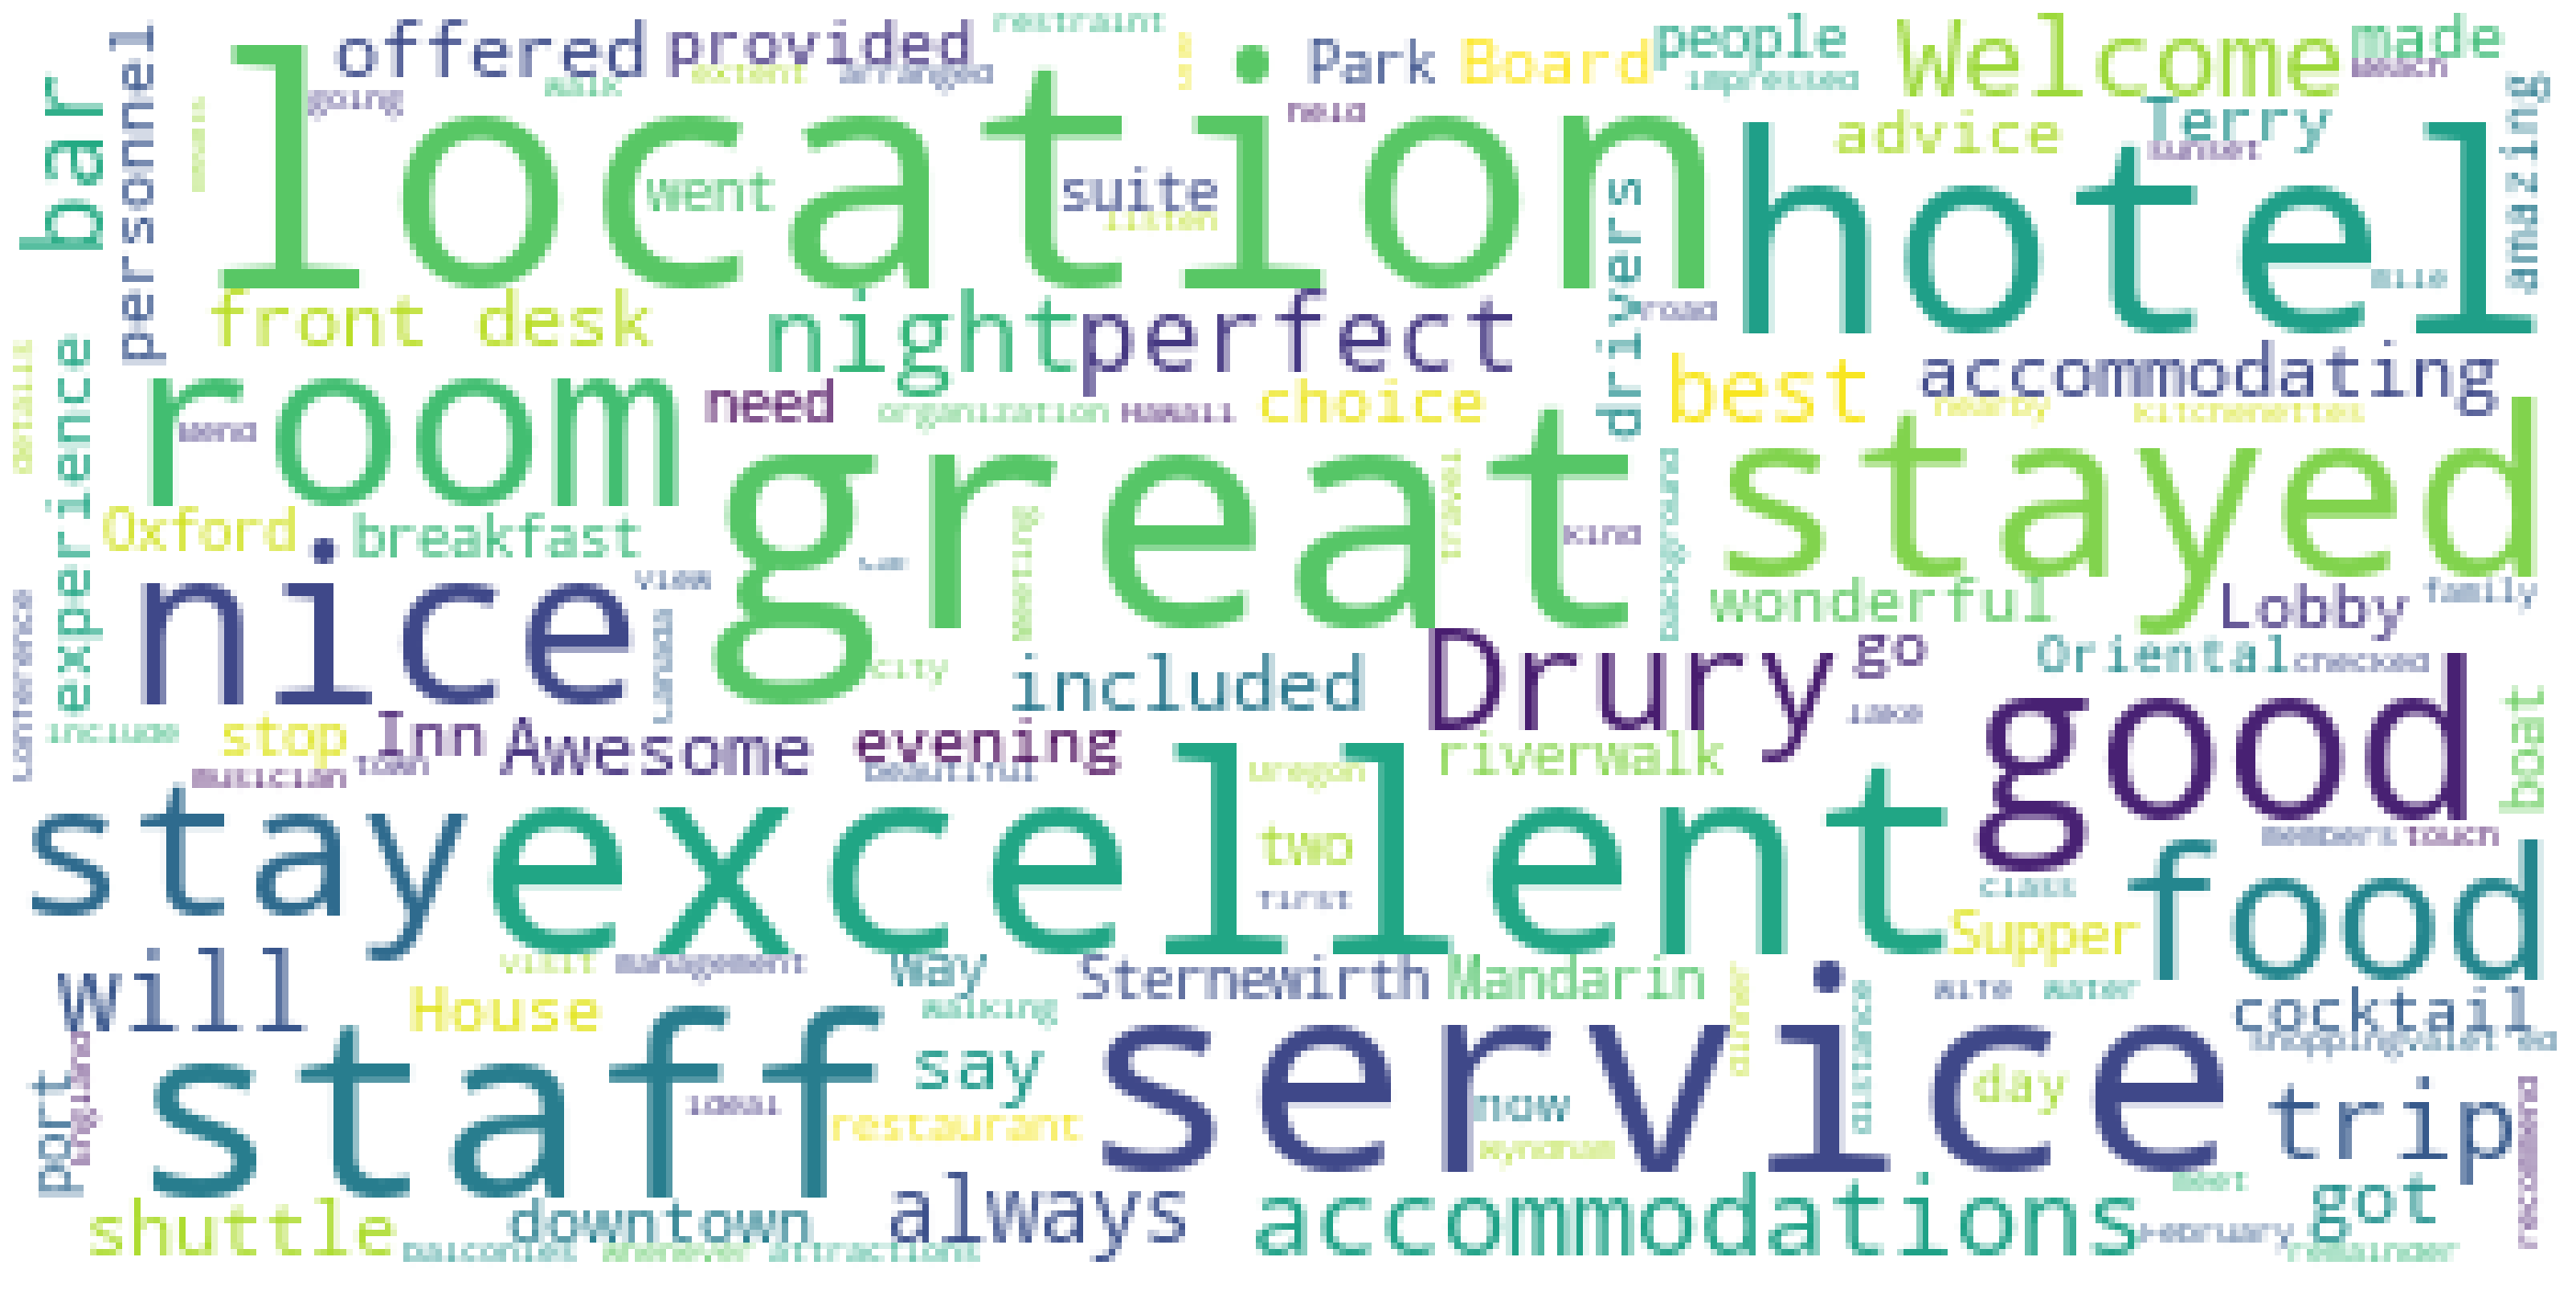

In [48]:
#highly positive reviews
wc(df['reviews.text'][df.polarity>0.8],'white','Common Words' )

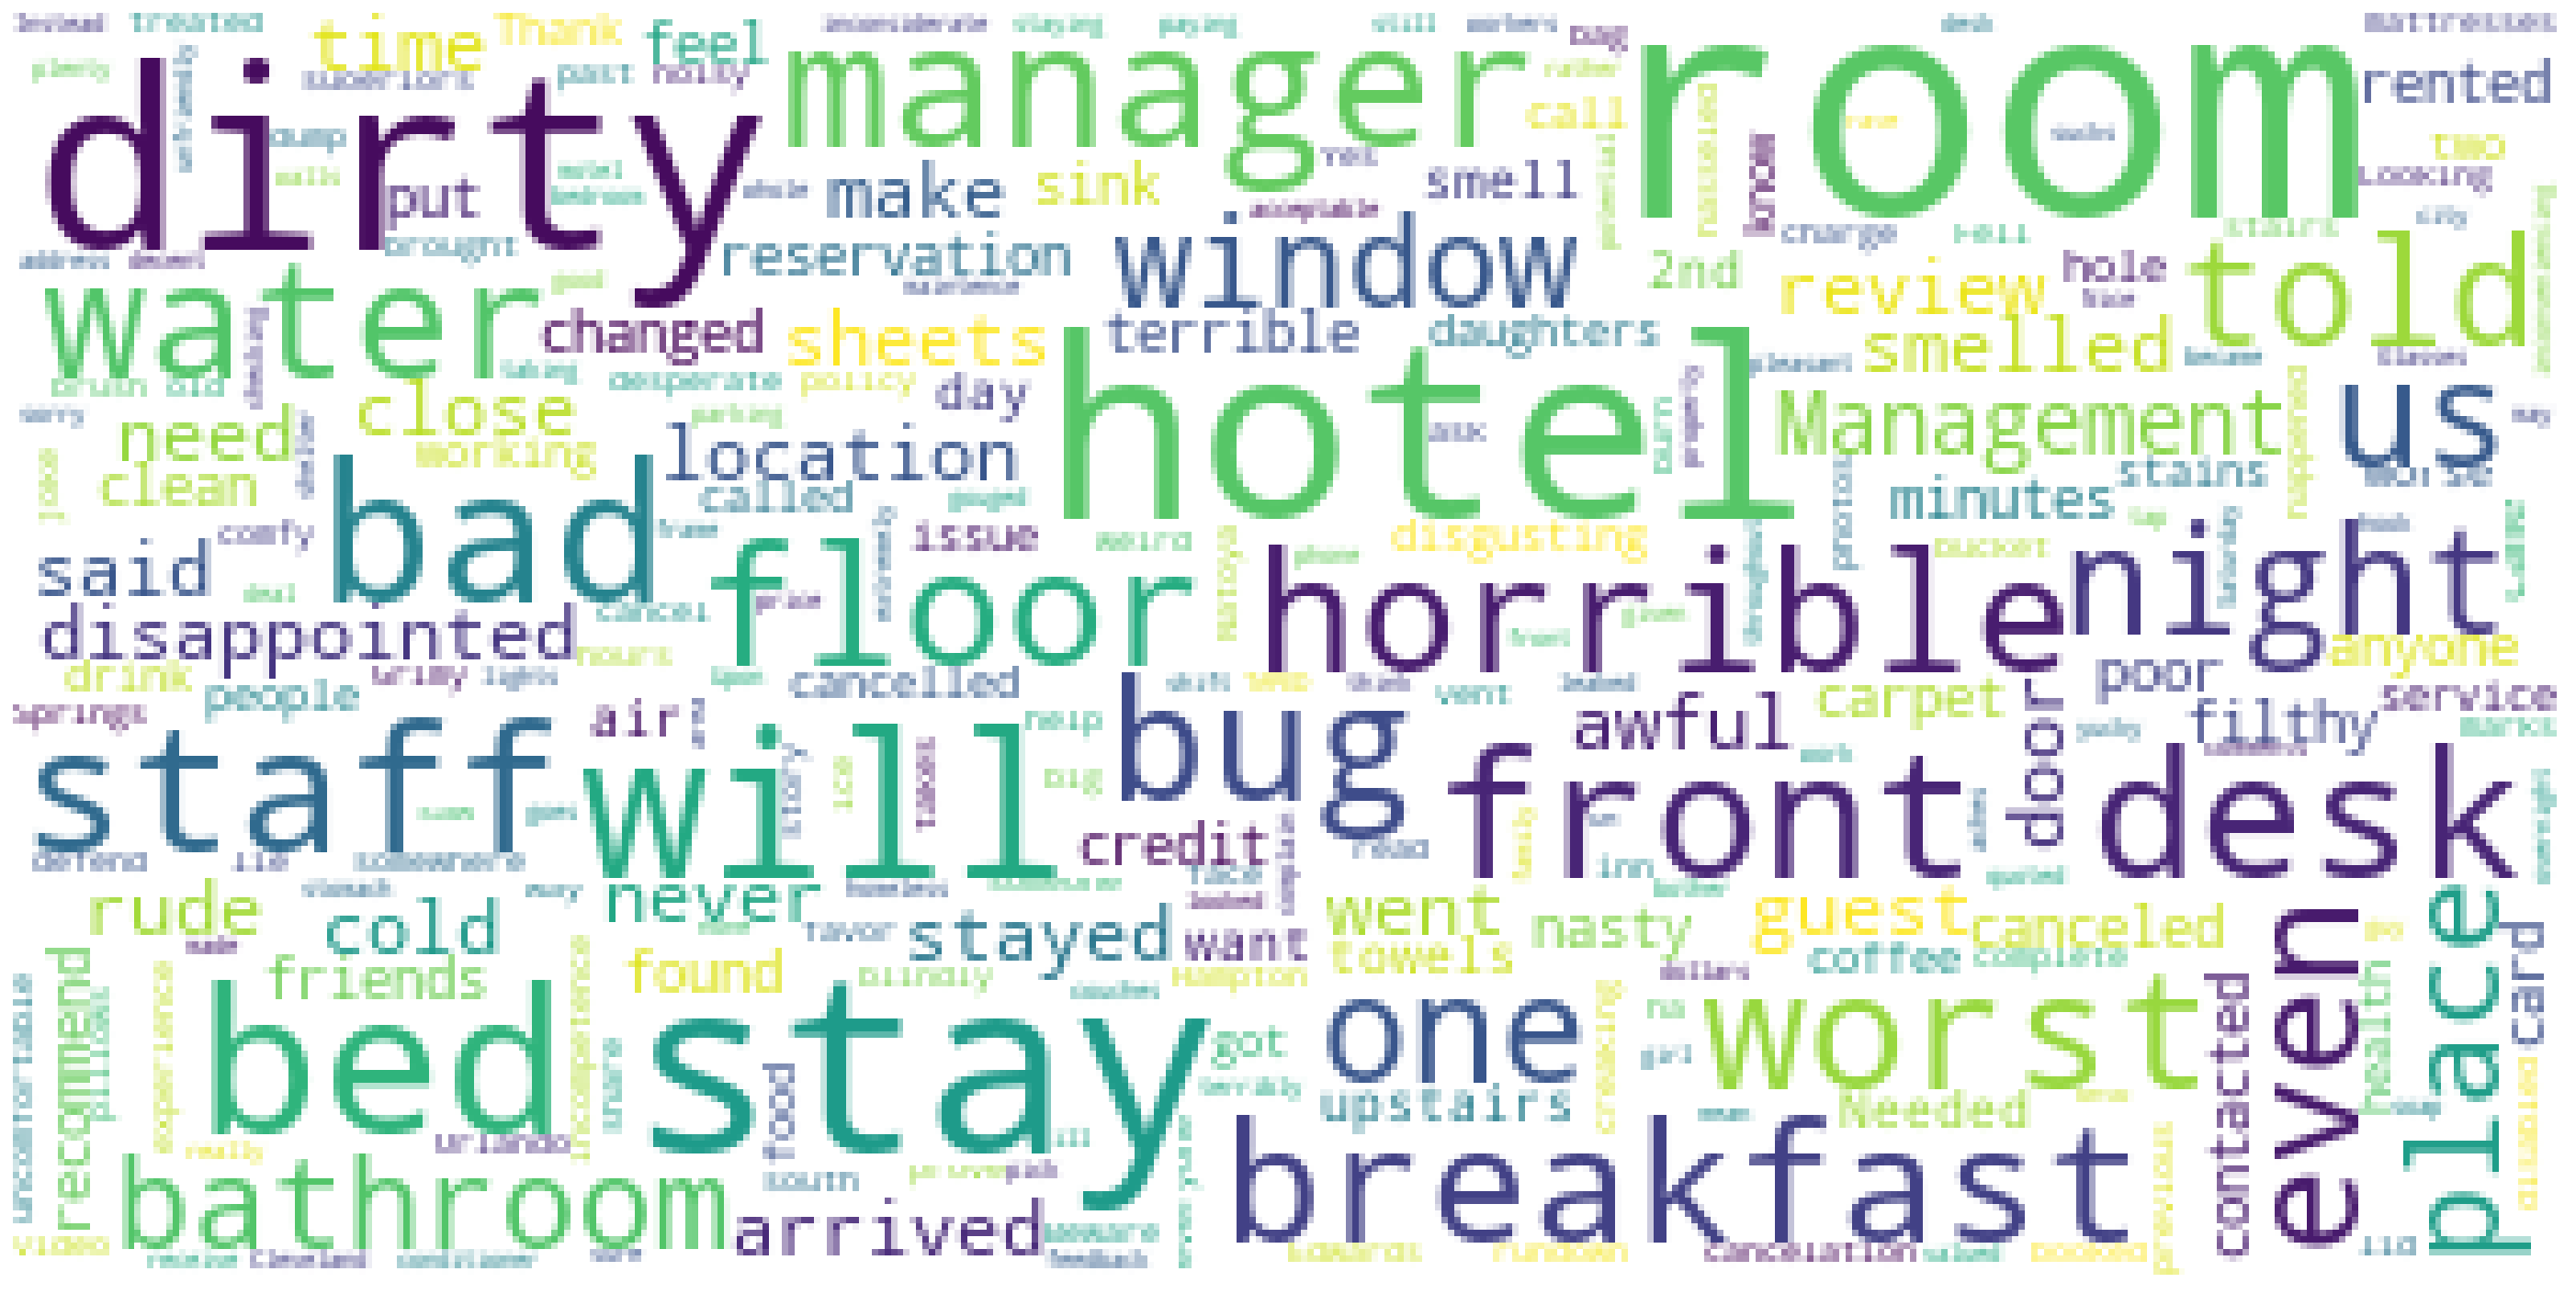

In [49]:
#highly negative reviews
wc(df['reviews.text'][df.polarity<-0.4],'white','Common Words' )

In [50]:
df['polarity'][df.polarity==0]= 0
df['polarity'][df.polarity > 0]= 1
df['polarity'][df.polarity < 0]= -1

 1.0    9469
-1.0     494
 0.0      37
Name: polarity, dtype: int64

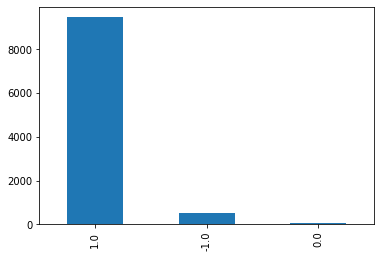

In [51]:
df.polarity.value_counts().plot.bar()
df.polarity.value_counts()